In [2]:
#Beschreibung: Dieses Program führt algorithmisches Handeln anhand eines technischen Indikators aus
#              der technisches Indikator ist MACD

## die Buy und Sell werden in get_signal umgetauscht: Der originaler Code führt zu den Verlusten

In [4]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = web.DataReader("AMZN", data_source="yahoo", start="2018-01-01", end="2020-01-01")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049


In [6]:
#Berechnung des MACD
#Langsam gleitender Durchschnitt
ema_26 = df["Adj Close"].ewm(span = 26, adjust = False).mean()
#Schnell gleitender Durchschnitt
ema_12 = df["Adj Close"].ewm(span = 12, adjust = False).mean()
#MACD Linie = Schnell gleitender Durchschnitt - Langsamer gleitender Durchschnitt
MACD = ema_12 - ema_26
#Signal Linie
signal = MACD.ewm(span = 9, adjust = False).mean()

In [7]:
df["MACD"] = MACD
df["Signal"] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010,0.000000,0.000000
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,1.211733,0.242347
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,2.577261,0.709329
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,5.177296,1.602923
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,8.569717,2.996282
...,...,...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,5.688908,1.996157
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,12.442558,4.085437
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,17.674251,6.803200


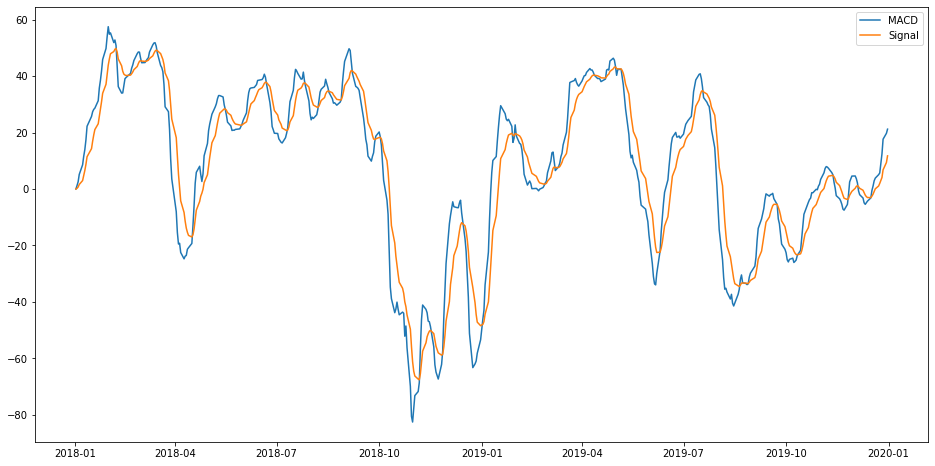

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df["MACD"], label = "MACD")
plt.plot(df["Signal"], label = "Signal")
plt.legend()
plt.show()

In [46]:
def get_signal(data):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(data)):
        if data["MACD"][i] > data["Signal"][i]:
            Buy.append(np.nan)
            if flag != 1 :
                if (data["MACD"][i] - data["Signal"][i]) > 0:
                    Sell.append(data["Adj Close"][i])
                    flag = 1
                else:
                    Sell.append(np.nan)
            else:
                Sell.append(np.nan)
        elif data["MACD"][i] < data["Signal"][i]:
            Sell.append(np.nan)
            if flag !=0:
                if (data["MACD"][i] - data["Signal"][i]) < 0:
                    Buy.append(data["Adj Close"][i])
                    flag = 0
                else:
                    Buy.append(np.nan)
            else:
                Buy.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
    return(Buy,Sell)

In [47]:
x = get_signal(df)

In [48]:
df["Buy_signal"] = x[0]
df["Sell_signal"] = x[1]
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_signal,Sell_signal
Date,,,,,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010,0.000000,0.000000,NaN,NaN
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,1.211733,0.242347,NaN,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,2.577261,0.709329,NaN,NaN
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,5.177296,1.602923,NaN,NaN
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,8.569717,2.996282,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,5.688908,1.996157,NaN,NaN
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,12.442558,4.085437,NaN,NaN
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,17.674251,6.803200,NaN,NaN


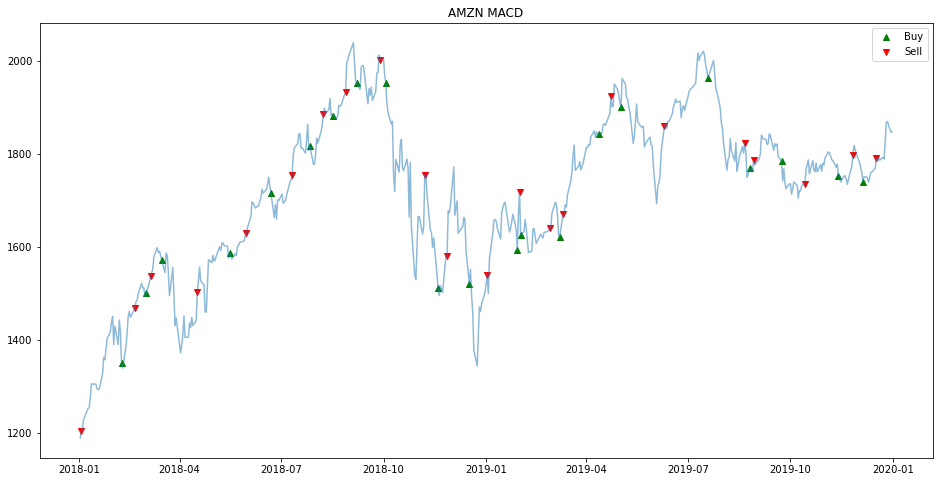

In [49]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df["Buy_signal"], color = "green", label = "Buy", marker ="^", alpha = 1)
plt.scatter(df.index, df["Sell_signal"], color = "red", label = "Sell", marker ="v", alpha = 1)
plt.plot(df.index, df["Adj Close"], alpha = 0.5)
plt.title("AMZN MACD")
plt.legend()
plt.show()